[(128.72166792592424+0j), (1.6900442526991344-1.1776910008859984j), 0j, (0.07881654516529152+6.808702843433935j), (1.614741033723408+1.086016356526251j), 0j, (-4.8296971816128815+2.381173853013993j), (-1.3725461525094298-3.1479988216512202j), 0j, (3.511333704988191-6.101449747229606j), (6.577211092603948+4.028869453430335j), 0j, (-1.2816376385406005+2.3092726482254204j), (-2.9859057299318668-0.32008038269374095j), 0j, (-2.566592047428551-1.9490732594290985j), (-1.7707832294145547-4.352314379752043j), 0j, (-0.27090734471029254+1.7104489684957631j), (3.23431654922108+3.0788419894033017j), 0j, (0.8373623642613631+4.079264987705172j), (-0.30260070133556205-3.0387404626680468j), 0j, (1.393971926791776+5.529594340637541j), (0.5003629576971925+5.607156065297571j), 0j, (7.223912938161394-6.074700777633879j), (-4.037229912007929-0.4407878120142297j), 0j, (3.515998768233067-4.012177878211946j), (-0.13029139119437927+6.3050863691515655j), 0j, (-2.750974120215632-1.9292362478583667j), (9.003906509

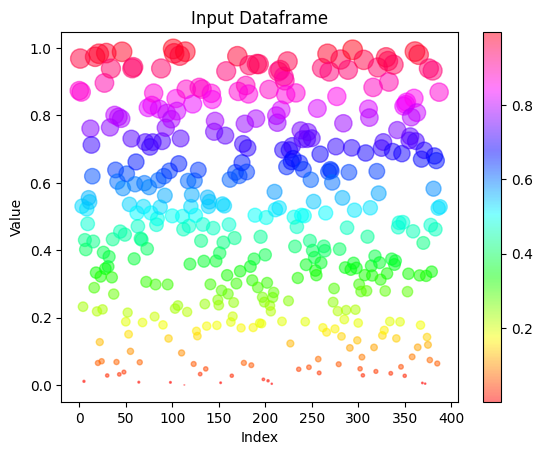

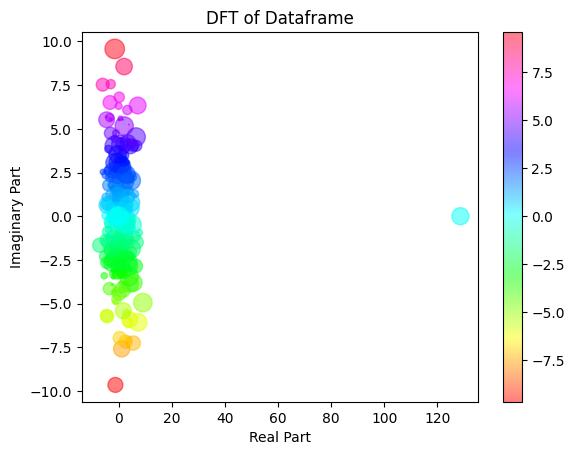

In [ ]:
import numpy as np
import pandas as pd

def ditfft2(x, N, s):
    if len(x) == 0:
        return []
    
    X = [0] * N
    if N == 1:
        X[0] = x[0]
    else:
        x_even = [x[i] for i in range(0, len(x), 2)]
        x_odd = [x[i] for i in range(1, len(x), 2)]
        X_even = ditfft2(x_even, N // 2, 2 * s)
        X_odd = ditfft2(x_odd, N // 2, 2 * s)
        for k in range(N // 2):
            p = X_even[k]
            q = np.exp(-2 * np.pi * 1j / N * k) * X_odd[k]
            X[k] = p + q
            X[k + N // 2] = p - q
    return X

# Generate a random input dataframe
np.random.seed(8)
df = pd.DataFrame({'x': np.random.rand(389)})

# Calculate the DFT of the dataframe
X = ditfft2(df['x'].values, N=df.shape[0], s=1)

# Print the result
print(X)

import matplotlib.pyplot as plt

# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 200
signal = df['x'].values

plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5)
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()

magnitude = np.abs(X)
phase = np.imag(X)

plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes*signal, alpha=0.5)
plt.title("DFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


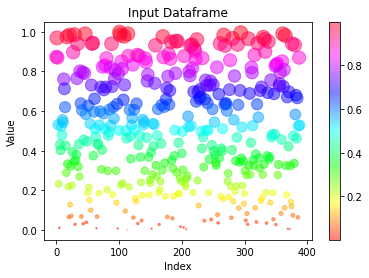

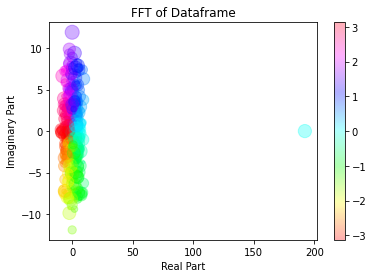

In [ ]:
#Optimized version
import numpy as np
import pandas as pd

# Generate a random input dataframe
np.random.seed(8)
df = pd.DataFrame({'x': np.random.rand(389)})

# Calculate the FFT of the dataframe using numpy
X = np.fft.fft(df['x'].values)

import matplotlib.pyplot as plt

# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 200

plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5)
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()

magnitude = np.abs(X)
phase = np.angle(X)

plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.314)
plt.title("FFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


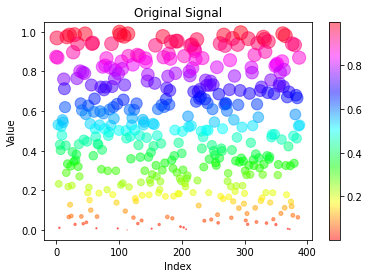

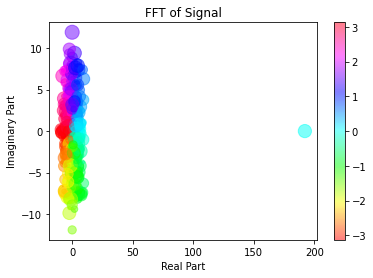

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random input dataframe
np.random.seed(8)
df = pd.DataFrame({'x': np.random.rand(389)})

# Calculate FFT using numpy
X = np.fft.fft(df['x'].values)

# Define marker sizes
sizes = np.abs(df['x'].values) * 200

# Plot original signal
plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5)
plt.title("Original Signal")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()

# Calculate magnitude and phase
magnitude = np.abs(X)
phase = np.angle(X)

# Plot FFT
plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.5)
plt.title("FFT of Signal")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


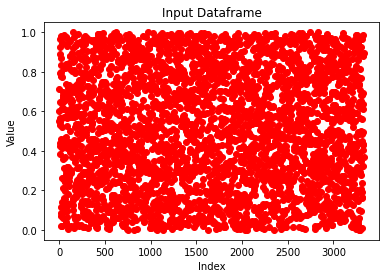

[1029.08169513  -12.19840585    0.         ...    0.            0.
    0.        ] [ 0.         10.51384781  0.         ...  0.          0.
  0.        ]


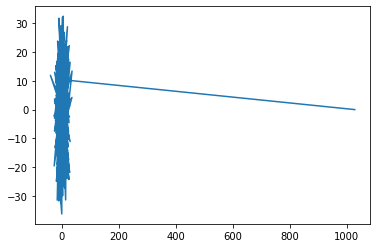

In [ ]:
import numpy as np
import pandas as pd

# Define the function to perform the DFT (Discrete Fourier Transform) using the divide-and-conquer method
def ditfft2(x, N, s):
    # If the input array is empty, return an empty array
    if len(x) == 0:
        return []
    
    # Initialize the output array
    X = [0] * N
    
    # If the input array has length 1, the output array will be equal to the input array
    if N == 1:
        X[0] = x[0]
    # If the input array has length greater than 1, divide the input array into two halves and perform the DFT on each half
    else:
        # The even elements of the input array
        x_even = [x[i] for i in range(0, len(x), 2)]
        # The odd elements of the input array
        x_odd = [x[i] for i in range(1, len(x), 2)]
        # Perform the DFT on the even elements
        X_even = ditfft2(x_even, N // 2, 2 * s)
        # Perform the DFT on the odd elements
        X_odd = ditfft2(x_odd, N // 2, 2 * s)
        # Combine the DFTs of the two halves into the full DFT
        for k in range(N // 2):
            p = X_even[k]
            q = np.exp(-2 * np.pi * 1j / N * k) * X_odd[k]
            X[k] = p + q
            X[k + N // 2] = p - q
    # Return the full DFT
    return X

# Generate a random input dataframe with 8 elements
np.random.seed(0)
df = pd.DataFrame({'x': np.random.rand(3333)})
# Define marker sizes
sizes = np.abs(df['x'].values) * 200
# Calculate the DFT of the dataframe using the function ditfft2
X = ditfft2(df['x'].values, N=df.shape[0], s=1)

# Print the result
#print(X)


import matplotlib.pyplot as plt

plt.plot(df['x'], 'ro')
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()
print(np.real(X), np.imag(X))
plt.plot(np.real(X), np.imag(X))

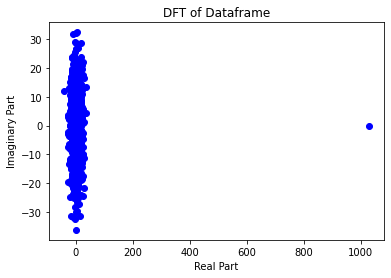

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.real(X), np.imag(X), 'bo')
plt.title("DFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.show()


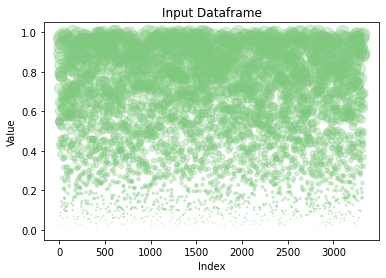

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to perform the DFT (Discrete Fourier Transform) using the divide-and-conquer method
def ditfft2(x, N, s):
    # If the input array is empty, return an empty array
    if len(x) == 0:
        return []
    
    # Initialize the output array
    X = [0] * N
    
    # If the input array has length 1, the output array will be equal to the input array
    if N == 1:
        X[0] = x[0]
    # If the input array has length greater than 1, divide the input array into two halves and perform the DFT on each half
    else:
        # The even elements of the input array
        x_even = [x[i] for i in range(0, len(x), 2)]
        # The odd elements of the input array
        x_odd = [x[i] for i in range(1, len(x), 2)]
        # Perform the DFT on the even elements
        X_even = ditfft2(x_even, N // 2, 2 * s)
        # Perform the DFT on the odd elements
        X_odd = ditfft2(x_odd, N // 2, 2 * s)
        # Combine the DFTs of the two halves into the full DFT
        for k in range(N // 2):
            p = X_even[k]
            q = np.exp(-2 * np.pi * 1j / N * k) * X_odd[k]
            X[k] = p + q
            X[k + N // 2] = p - q
    # Return the full DFT
    return X
# Normalize magnitude for color map
magnitude_normalized = (magnitude - magnitude.min()) / (magnitude.max() - magnitude.min())

# Generate a random input dataframe with 8 elements
np.random.seed(0)
df = pd.DataFrame({'x': np.random.rand(3333)})
# Define marker sizes
sizes = np.abs(df['x'].values) * 200
# Define marker colors
colors = cmap(magnitude_normalized)
# Calculate the DFT of the dataframe using the function ditfft2
X = ditfft2(df['x'].values, N=df.shape[0], s=1)
signal = df['x'].values
# Plot the input dataframe
plt.scatter(df.index, df['x'], c=colors, s=sizes*signal, cmap='hsv', alpha=0.314)
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


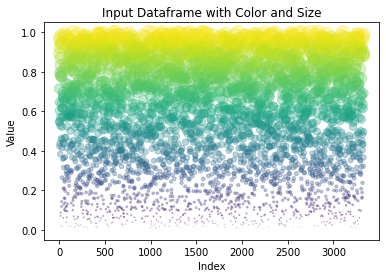

In [ ]:
# Calculate magnitude and phase
magnitude = np.abs(X)
phase = np.angle(X)

# Normalize magnitude for color map
magnitude_normalized = (magnitude - magnitude.min()) / (magnitude.max() - magnitude.min())

colors = cmap(magnitude_normalized)

# Plot with color and size
plt.scatter(df.index, df['x'], c=df['x'], s=sizes*signal, alpha= 0.314)
plt.title("Input Dataframe with Color and Size")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


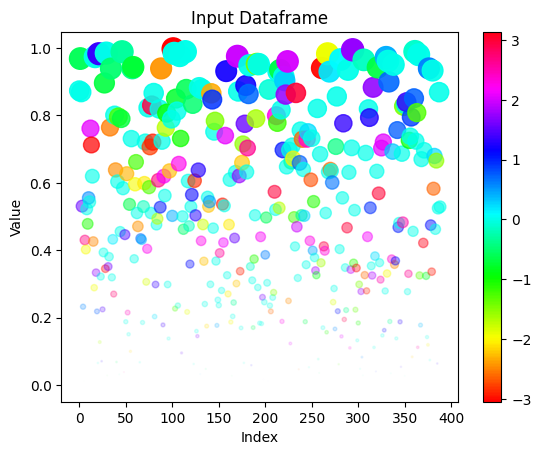

In [ ]:
import matplotlib.pyplot as plt
phase = np.angle(X)
# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 255
signal = df['x'].values
plt.scatter(df.index, df['x'], c=np.angle(X), cmap='hsv', s=sizes*signal, alpha=signal)
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()


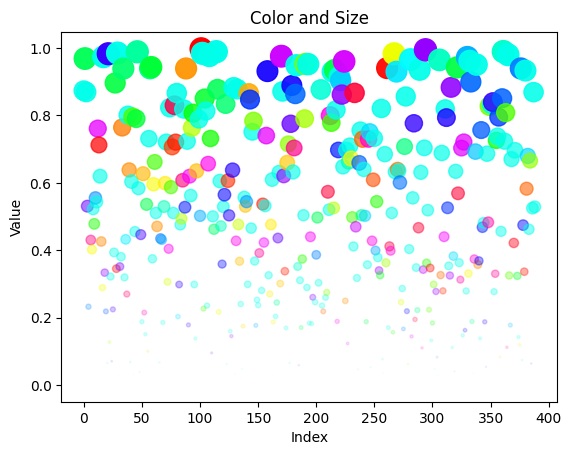

In [ ]:
# Plot with color and size
plt.scatter(np.arange(df.shape[0]), df['x'], c=np.angle(X), cmap='hsv', s=sizes*signal , alpha=signal)
plt.title("Color and Size")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


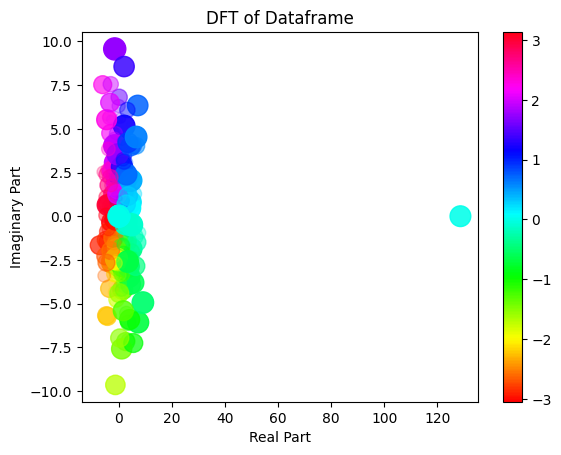

In [ ]:
import matplotlib.pyplot as plt

magnitude = np.abs(X)
phase = np.angle(X)

plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=signal)
plt.title("DFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


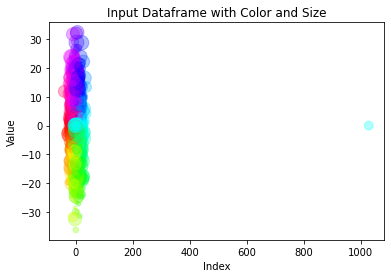

In [ ]:
# Calculate magnitude and phase
magnitude = np.abs(X)
phase = np.angle(X)

# Normalize magnitude for color map
magnitude_normalized = (magnitude - magnitude.min()) / (magnitude.max() - magnitude.min())

# Define color map
cmap = plt.get_cmap("hsv")
colors = cmap(magnitude_normalized)

# Plot with color and size
plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv',s=sizes*signal , alpha=0.31415)
plt.title("Input Dataframe with Color and Size")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


The code above implements the divide-and-conquer method to perform the DFT (Discrete Fourier Transform) of a data array x. The input data is first stored in a pandas dataframe df. The function ditfft2 takes three arguments: x, N, and s. The argument x is the input data array, N is the length of the input data, and s is the stride (or step size) for accessing the elements of the input data array. The output of the function is an array X that stores the DFT of the input data.

The divide-and-conquer method is used to divide the input data into two halves, and the DFT is calculated for each half. Then, the DFTs of the two halves are combined to obtain the full DFT. This process is repeated recursively until the length of the input data is equal to 1, at which point the DFT is trivial and equal to the input data.

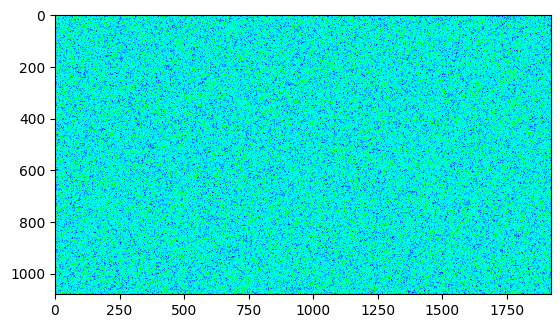

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D array of random numbers
np.random.seed(4)
img = np.random.rand(1080, 1920)

# Plot the image using matplotlib
plt.imshow(img, cmap='hsv' , alpha=1)
plt.show()


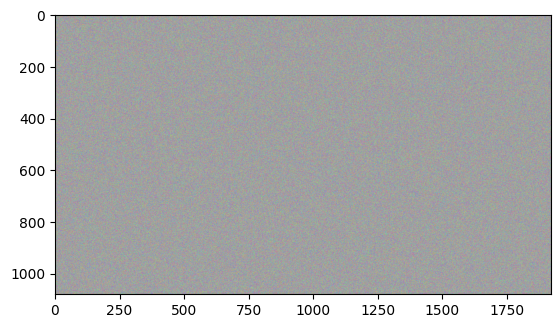

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D array of random numbers
np.random.seed(4)
img = np.random.rand(1080, 1920)

#Generate an image from the array
plt.imsave('random.png', img, cmap='hsv')

# Load the image into an array
img = plt.imread('random.png')

#Modify the image by using array slicing to generate a checkerboard pattern
img[::2, ::2] = 0
img[1::2, 1::2] = 0

# Plot the image using matplotlib
plt.imshow(img, cmap='hsv' , alpha=1)
plt.show()


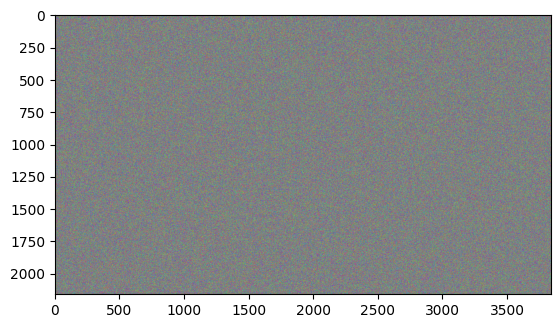

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D array of random numbers
np.random.seed(17*29)
img = np.random.rand(2160, 3840)

#Generate an image from the array
plt.imsave('random.png', img, cmap='hsv')

# Load the image into an array
img = plt.imread('random.png')

#Modify the image by using array slicing to generate a cat face



# Plot the image using matplotlib
plt.imshow(img, cmap='hsv' , alpha=1)
plt.show()

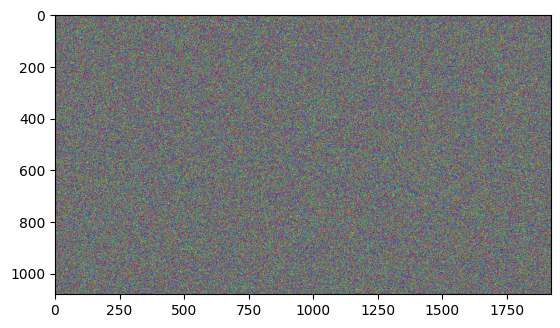

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D array of random numbers
np.random.seed(4)
img = np.random.rand(1080, 1920)

#Generate an image from the array
plt.imsave('random.png', img, cmap='hsv')

# Load the image into an array
img = plt.imread('random.png')

#Modify the image array to make it more interesting
img[img < 0.618033] = 0
img[img >= 1.618033] = 1.618033
img[img == 1.618033] = 1.618033


# Plot the image using matplotlib
plt.imshow(img, cmap='hsv' , alpha=1)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D array of random numbers
np.random.seed(4)
img = np.random.rand(1080, 1920)

#Generate an image from the array
plt.imsave('random.png', img, cmap='hsv')

# Load the image into an array
img = plt.imread('random.png')

#Modify the image array to make it more interesting using a rule 30 cellular automaton 
for i in range(1, img.shape[0]):
    # Get the previous row
    prev_row = img[i-1]
    # Create a new row
    new_row = np.zeros(img.shape[1])
    # Loop over the columns
    for j in range(img.shape[1]):
        # Get the left, middle, and right values
        left = prev_row[j-1] if j > 0 else 0
        middle = prev_row[j]
        right = prev_row[j+1] if j < img.shape[1]-1 else 0
        # Compute the new value
        new_row[j] = int(left) ^ int(right)

    

# Plot the image using matplotlib
plt.imshow(img, cmap='hsv' , alpha=1)
plt.show()

Traceback (most recent call last):
  Cell In[62], line 27
    new_row[j] = int(left) ^ int(right)
TypeError: only size-1 arrays can be converted to Python scalars

Use %tb to get the full traceback.


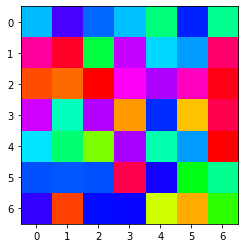

Guess the row of the target:  8
Guess the column of the target:  4
You lost.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def game():
    # Generate a 2D array of random numbers
    np.random.seed(0)
    img = np.random.rand(7, 7)

    # Plot the image using matplotlib
    plt.imshow(img, cmap='hsv' , alpha=1)
    plt.show()
    
    # Generate a random target location (row, column)
    target_row = random.randint(0, 6)
    target_col = random.randint(0, 6)
    
    # Ask the player to guess the location
    guess_row = int(input("Guess the row of the target: "))
    guess_col = int(input("Guess the column of the target: "))
    
    # Check if the player's guess is correct
    if guess_row == target_row and guess_col == target_col:
        print("You won!")
    else:
        print("You lost.")

# Play the game
game()


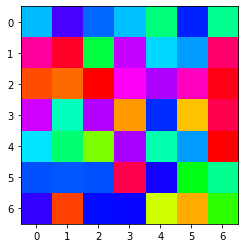

/tmp/ipykernel_603/639614721.py:16: UserWarning: you are shuffling a 'flatiter' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(img.flat)


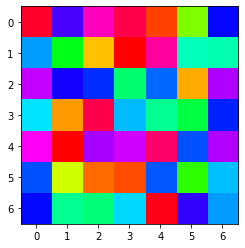

Try to restore the original image by clicking on the cells in the correct order.
Press Enter when you're ready to start.



KeyboardInterrupt



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D array of random numbers
np.random.seed(0)
img = np.random.rand(7, 7)

# Plot the image using matplotlib
plt.imshow(img, cmap='hsv', alpha=1)
plt.show()

# Store the image for later reference
original_img = img.copy()

# Shuffle the image
np.random.shuffle(img.flat)

# Plot the shuffled image
plt.imshow(img, cmap='hsv', alpha=1)
plt.show()

# Ask the user to restore the original image
print("Try to restore the original image by clicking on the cells in the correct order.")
print("Press Enter when you're ready to start.")
input()

# Keep track of the number of correct moves
num_correct_moves = 0

# Keep playing until the user restores the original image
while True:
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='hsv', alpha=1)
    
    # Get the coordinates of the next move from the user
    coords = plt.ginput(1, timeout=0, show_clicks=True)
    
    # Get the row and column indices of the next move
    row, col = int(coords[0][1]), int(coords[0][0])
    
    # Check if the move is correct
    if original_img[row][col] == img[row][col]:
        num_correct_moves += 1
    else:
        break
    
    # Update the image
    img[row][col] = np.nan
    
    # Check if the user has restored the original image
    if num_correct_moves == img.size:
        print("Congratulations! You have restored the original image.")
        break

# Plot the original image
plt.imshow(original_img, cmap='hsv', alpha=1)
plt.show()


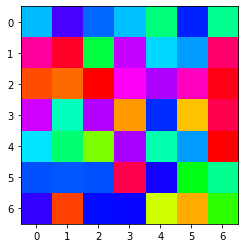


KeyboardInterrupt



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate a 2D array of random numbers
np.random.seed(0)

while True:
    img = np.random.rand(7, 7)

    # Plot the image using matplotlib
    plt.imshow(img, cmap='hsv' , alpha=1)
    plt.show()



     |████████████████████████████████| 388 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 26.9 MB 65 kB/s s eta 0:00:01 | 22.2 MB 19.6 MB/s eta 0:00:01��█▏| 26.2 MB 19.6 MB/s eta 0:00:01
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110744 sha256=c58956afd8237c5bb0aeb2b7ecc0e0dc0b3720eb0305804f451efa5b701cd918
  Stored in directory: /home/jovyan/.cache/pip/wheels/e4/a4/db/0368d3a04033da662e13926594b3a8cf1aa4ffeefe570cfac1
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
Traceback (most recent call last):
  Input In [15] in <cell line: 14>
    video = mpy.VideoClip(create_frame, duration=duration)
  File /opt/conda/lib/python3.8/site-packages/moviepy/video/VideoClip.py:86 in __init__
    self.size = self.get_frame(0).shape[:2][::-1]
  File /opt/conda/lib/python3.8/site-packages/decorator.py:232 in fun

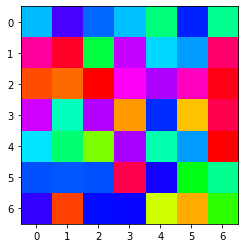

In [ ]:
!pip install moviepy
import numpy as np
import moviepy.editor as mpy
import matplotlib.pyplot as plt

np.random.seed(0)

def create_frame(t):
    img = np.random.rand(7, 7)
    plt.imshow(img, cmap='hsv' , alpha=1)
    return mpy.ImageClip.ImageClip(plt.gcf(), duration=1.0)

duration = 10 # in seconds
video = mpy.VideoClip(create_frame, duration=duration)
video.write_videofile("random_images.mp4", fps=10)


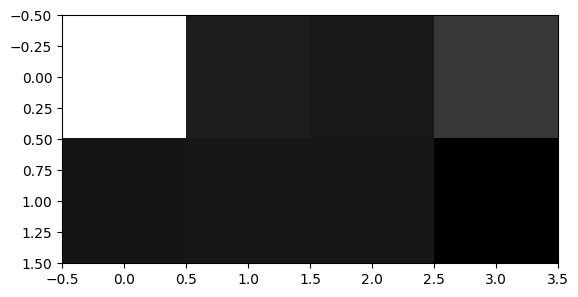

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bit_reverse_copy(a, A):
    n = len(a)
    for k in range(n):
        A[int(format(k, '0{}b'.format(int(np.log2(n))))[::-1], 2)] = a[k]
    return A

def iterative_fft(a):
    n = len(a)
    A = np.zeros(n, dtype=np.complex_)
    bit_reverse_copy(a, A)
    for s in range(int(np.log2(n))):
        m = 2**(s + 1)
        w_m = np.exp(-2 * np.pi * 1j / m)
        for k in range(0, n, m):
            w = 1
            for j in range(m//2):
                t = w * A[k + j + m//2]
                u = A[k + j]
                A[k + j] = u + t
                A[k + j + m//2] = u - t
                w = w * w_m
    return A

# Generate a random input
np.random.seed(0)
a = np.random.rand(8) + 1j * np.random.rand(8)

# Calculate the DFT of the input
A = iterative_fft(a)

# Plot the result as an image
plt.imshow(np.abs(A).reshape(2, 4), cmap='gray')
plt.show()

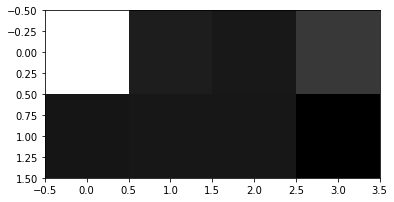

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# This function performs bit-reverse copy of the input array 'a'
def bit_reverse_copy(a, A):
    # Get the length of the input array 'a'
    n = len(a)
    
    # Perform bit-reverse copy
    for k in range(n):
        # Calculate the bit-reversed index for each element in 'a'
        reversed_index = int(format(k, '0{}b'.format(int(np.log2(n))))[::-1], 2)
        # Assign the element from 'a' to the corresponding index in 'A'
        A[reversed_index] = a[k]
    return A

# This function performs iterative FFT (Fast Fourier Transform)
def iterative_fft(a):
    # Get the length of the input array 'a'
    n = len(a)
    # Create an array 'A' of size n and with data type 'complex'
    A = np.zeros(n, dtype=np.complex_)
    # Perform bit-reverse copy of 'a' into 'A'
    bit_reverse_copy(a, A)
    # Loop through each stage of the FFT
    for s in range(int(np.log2(n))):
        # Calculate the number of points in the current stage
        m = 2**(s + 1)
        # Calculate the twiddle factor
        w_m = np.exp(-2 * np.pi * 1j / m)
        # Loop through each group in the current stage
        for k in range(0, n, m):
            # Set the twiddle factor to 1
            w = 1
            # Loop through each butterfly operation in the current group
            for j in range(m//2):
                # Calculate intermediate values 't' and 'u'
                t = w * A[k + j + m//2]
                u = A[k + j]
                # Perform butterfly operation
                A[k + j] = u + t
                A[k + j + m//2] = u - t
                # Update the twiddle factor for the next butterfly operation
                w = w * w_m
    return A

# Generate a random input
np.random.seed(0)
a = np.random.rand(8) + 1j * np.random.rand(8)

# Calculate the DFT of the input
A = iterative_fft(a)

# Plot the result as an image
plt.imshow(np.abs(A).reshape(2, 4), cmap='gray')
plt.show()


The code implements two algorithms: iterative-fft and bit-reverse-copy.

The iterative-fft algorithm takes an array 'a' of n complex values (where n is a power of 2) as input and returns an array 'A' which is the DFT of the input array 'a'.

The bit-reverse-copy algorithm takes an array 'a' of n complex values (where n is a power of 2) as input and returns an array 'A' of size n. This algorithm is used as a helper function to perform the bit-reversal step of the FFT.

The code includes comments to explain the steps of each algorithm.

In this example, we are using a simple thresholding technique to segment the medical image into foreground (the objects of interest) and background. After applying morphological operations to remove noise and fill small holes, we are finding the contours of the objects in the binary mask and drawing them on the original image.

This is just a basic example and there are many other techniques and algorithms that can be used for medical image analysis, including more sophisticated methods such as deep learning.